# Ford Gobike Dataset
## by Dina Dawood

## Preliminary Wrangling

> This dataset represents individual rides which is made using a bike-sharing system and it is 183412 trips.

In [250]:
# importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [251]:
#loading the dataset and displaying the first 5 rows of it
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [252]:
#printing the shape/info about the columns (Structure of the dataset)
print(df_bike.shape)
print(df_bike.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

### What is the structure of your dataset?

> There are 183412 fordgobike trips(Rows) in the dataset and 16 colums. There are 9 numerical columns, and the rest of columns are strings and 2 of them need to change to be datatime, other 3 to be integer and one to be boolean. 


### What is/are the main feature(s) of interest in your dataset?

>  The most interested feature is  to find out how trip duration is dependent on other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I think that trip duration is highly dependent on the start station and end station. Furthermore, the places that are more crowded I think will receive more rides so duration in sec should be high. I also think the users type,  the birth year of the users and their gender should also effect trip duration.

In [253]:
#changing the start and end time to be datetime
df_bike.start_time = pd.to_datetime(df_bike.start_time)
df_bike.end_time = pd.to_datetime(df_bike.end_time)

In [254]:
#changing the bike share column to be boolean
df_bike.bike_share_for_all_trip = (df_bike.bike_share_for_all_trip == 'Yes')

In [255]:
# changinf IDs of start and end stations, and birth year to be int
df_bike.start_station_id =  df_bike.start_station_id.fillna(0.0).astype(int)
df_bike.end_station_id =  df_bike.end_station_id.fillna(0.0).astype(int)
df_bike.member_birth_year = df_bike.member_birth_year.fillna(0.0).astype(int)

In [256]:
#Checking the changes
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [257]:
#checking for duplicated values
df_bike.duplicated().sum()

0

In [258]:
#checking for null values
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [259]:
#dropping null values
df_bike= df_bike.dropna()

In [260]:
#checking there is no more null values
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [261]:
#getting some insights
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


- There is an average of 704 sec for the trips
- The maximum number of seconds that was for a trip is 84548 sec.
- The youngest user of the ford go bike system is born in 2001 
- The average year where our most users is 1984
- The oldest user is born in 1878

In [262]:
#creating new columns our of datetime: Day, Month and Hour
df_bike['month'] = df_bike.start_time.dt.strftime('%b')
df_bike['day'] = df_bike.start_time.dt.strftime('%a')
df_bike['hour'] = df_bike.start_time.dt.strftime('%H')

In [263]:
#getting age using bith year column
df_bike['age'] = datetime.now().year - df_bike.member_birth_year

In [264]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False,Feb,Thu,17,36
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False,Feb,Thu,12,48
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False,Feb,Thu,17,31
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,Feb,Thu,23,46
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,False,Feb,Thu,23,61


In [265]:
#checking the unique values of start time
df_bike.start_time.dt.strftime("%d/%m/%Y").unique()

array(['28/02/2019', '27/02/2019', '26/02/2019', '25/02/2019',
       '24/02/2019', '23/02/2019', '22/02/2019', '21/02/2019',
       '20/02/2019', '19/02/2019', '18/02/2019', '17/02/2019',
       '16/02/2019', '15/02/2019', '14/02/2019', '13/02/2019',
       '12/02/2019', '11/02/2019', '10/02/2019', '09/02/2019',
       '08/02/2019', '07/02/2019', '06/02/2019', '05/02/2019',
       '04/02/2019', '03/02/2019', '02/02/2019', '01/02/2019'],
      dtype=object)

In [266]:
#checking the unique values of end time
df_bike.end_time.dt.strftime("%d/%m/%Y").unique()

array(['01/03/2019', '28/02/2019', '27/02/2019', '26/02/2019',
       '25/02/2019', '24/02/2019', '23/02/2019', '22/02/2019',
       '21/02/2019', '20/02/2019', '19/02/2019', '18/02/2019',
       '17/02/2019', '16/02/2019', '15/02/2019', '14/02/2019',
       '13/02/2019', '12/02/2019', '11/02/2019', '10/02/2019',
       '09/02/2019', '08/02/2019', '07/02/2019', '06/02/2019',
       '05/02/2019', '04/02/2019', '03/02/2019', '02/02/2019',
       '01/02/2019'], dtype=object)

- As we can see it is all happened in year 2019 and all started in Feb and ended in the same month expect few trips ended in March so no need to investigate into month

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

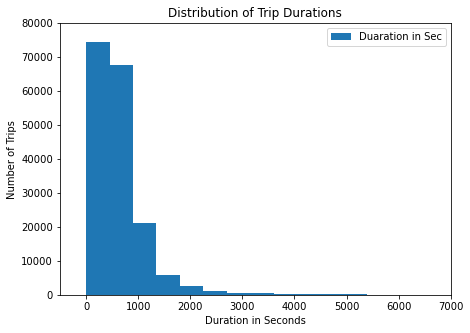

In [267]:
#ploting a histogram chart to display the relation between number of trips and the trips durations 
binsize = 450
bins = np.arange(0, df_bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[7, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins = bins, label= 'Duaration in Sec')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Seconds')
plt.ylabel('Number of Trips')
plt.axis([-500, 7000, 0, 80000])

plt.legend()
plt.show()

- This is a long tail so I will make log scale for it.

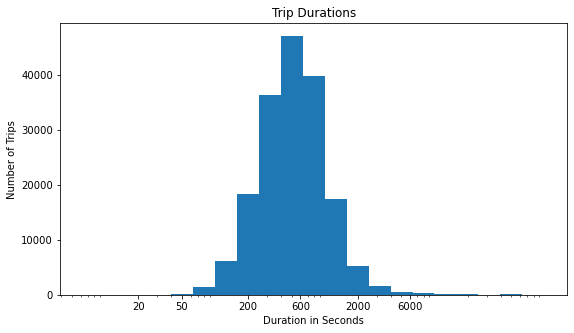

In [268]:
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 2);
newbin = 10 ** np.arange(0.8, np.log10(df_bike.duration_sec.max())+0.2, 0.2);
plt.hist(df_bike.duration_sec, bins = newbin);
plt.xscale('log');
tick_locs = [20, 50, 200, 600, 2000, 6000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('Duration in Seconds');
plt.title('Trip Durations');
plt.ylabel('Number of Trips');

- I used bin size which is  incremented by 0.2 powers of ten. I also customed the tick marks to demonstrate the log scaling.
- Most of the duration values are less than 2000 seconds with peak around 600 seconds.

In [269]:
#due to huge number of ages I am grouping ages into groups to be easliy used in our investigation 
df_bike =df_bike[df_bike['age'] <=80]
df_bike['age_groups'] = df_bike['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 80' if 60<x<=80
                                                  else x)

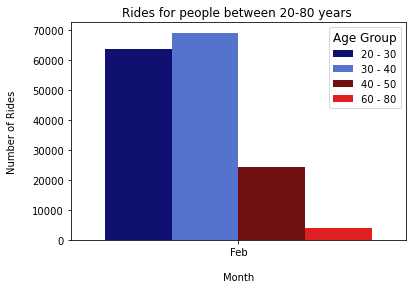

In [270]:
palette = {'20 - 30': 'navy', '30 - 40': 'royalblue', '40 - 50': 'maroon','60 - 80':'red'}
ax = sb.countplot(x='month', hue='age_groups', palette=palette, data=df_bike[df_bike['age_groups'].isin(['20 - 30', '30 - 40', '40 - 50','60 - 80'])].sort_values(by=['month', 'age_groups']))
plt.title('Rides for people between 20-80 years ', fontsize=12)
plt.xlabel('Month', labelpad=15)
plt.ylabel('Number of Rides', labelpad=15)
le = ax.legend()
le.set_title('Age Group',prop={'size':12})
ax = plt.gca()

- As we can see that the age groups(20-40) is the highest groups in number of rides while the age group(60-80) comes the least And I think this may reflect the older user, the less physical exercise they do

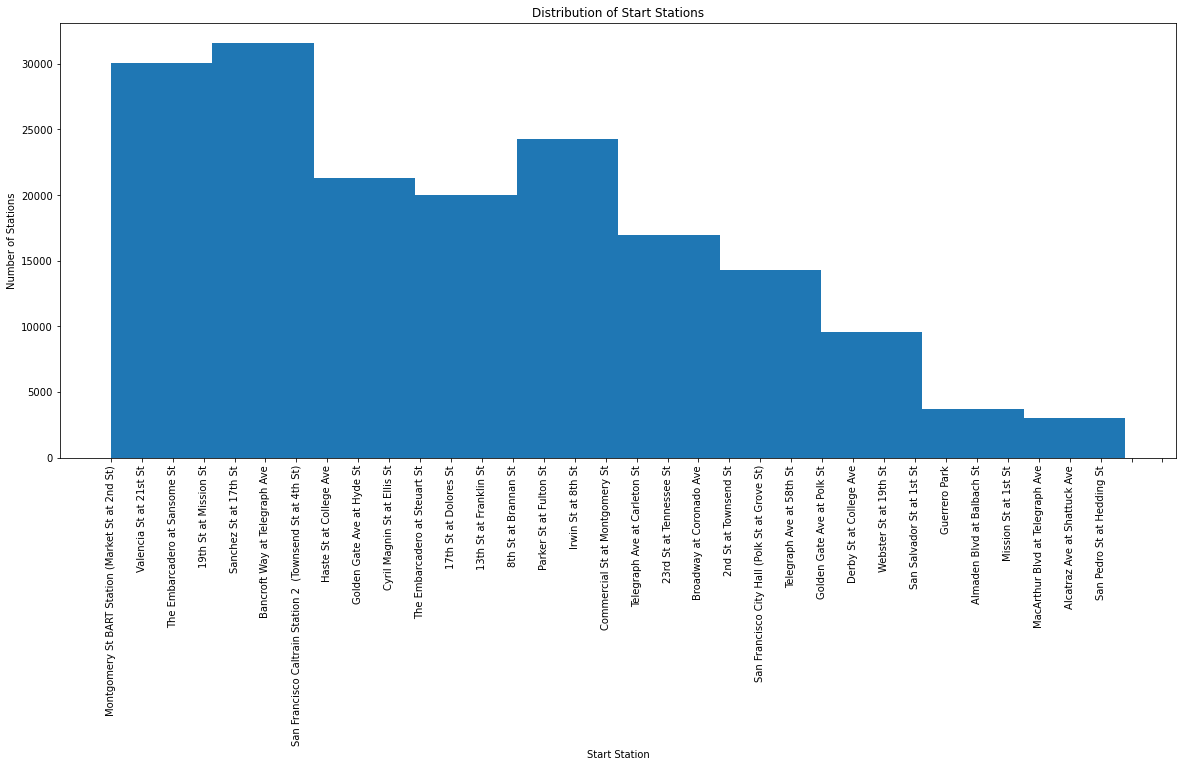

In [271]:

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 400, 10), rotation=90)
plt.hist(data = df_bike, x = 'start_station_name')
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

- The most two peak start stations are Sanchez St at 17 St. and Bancroft Way at Telegraph Ave.

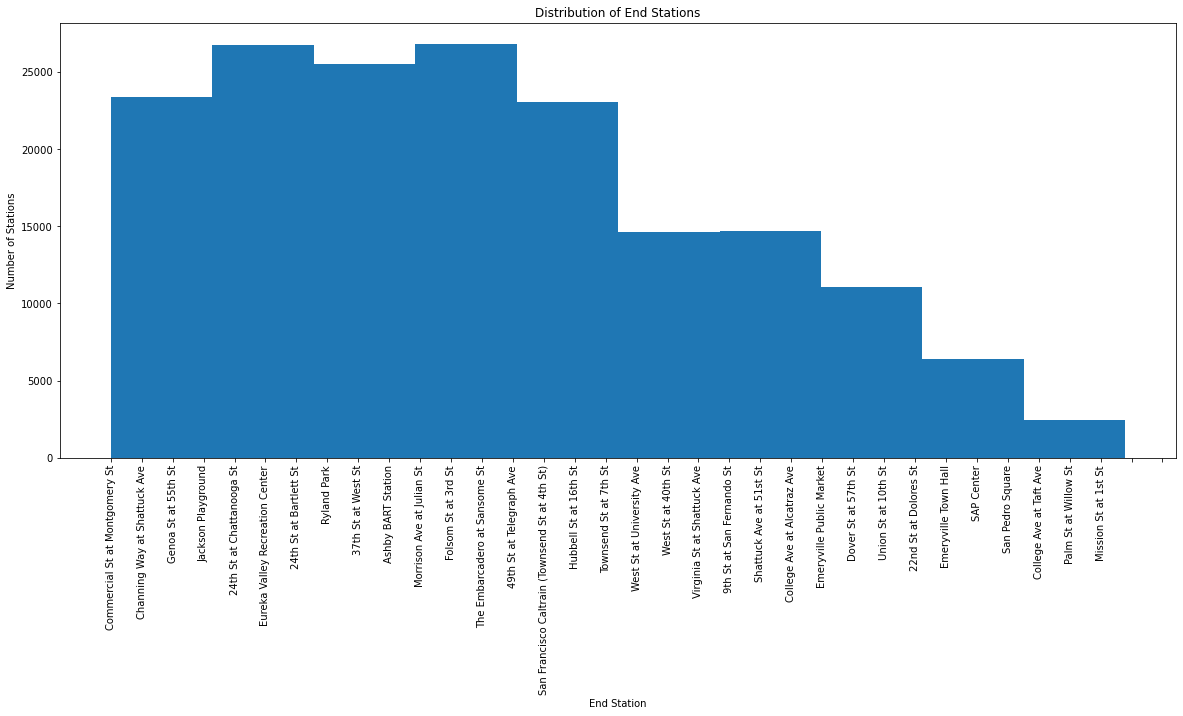

In [272]:
plt.figure(figsize=[20, 8])
plt.xticks(range(0, 400, 10),rotation = 90)
plt.hist(data = df_bike, x = 'end_station_name')
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

- While here there are main four end stations for our users and they are: Folsom St, The Embarcadero, 24th St., and Eureka Valley Center

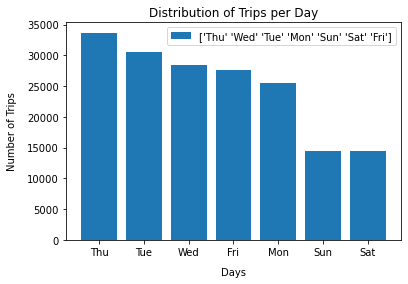

In [273]:
#plotting number of trips/rides per day
x = df_bike.day.unique()
plt.bar(x = df_bike.day.value_counts().keys(), height = df_bike.day.value_counts(), label = x)
plt.xlabel('Days',labelpad = 10)
plt.ylabel('Number of Trips',labelpad = 10)
plt.title('Distribution of Trips per Day');
plt.legend()

- As shown the trips count values are very high during the week' work days and the peak is Thursday while on the weekend the trips decrease to its least count. 

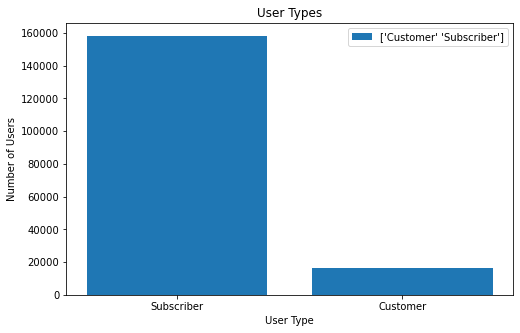

In [274]:
#plotting user types to compare between them
plt.figure(figsize=[8,5])
plt.bar(x = df_bike.user_type.value_counts().keys(), height = df_bike.user_type.value_counts(), label = df_bike.user_type.unique())
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('User Types')
plt.legend()
plt.show()

- Subscribers are way higher users than customers

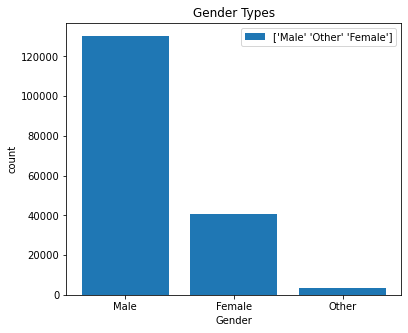

In [275]:
#plotting genders and counting their values
plt.figure(figsize=[6,5])
plt.bar(x = df_bike.member_gender.value_counts().keys(), height = df_bike.member_gender.value_counts(),
        label = df_bike.member_gender.unique() )
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender Types')
plt.legend()
plt.show()

- The majority of users are Males. Females tend to use bikes less than males.

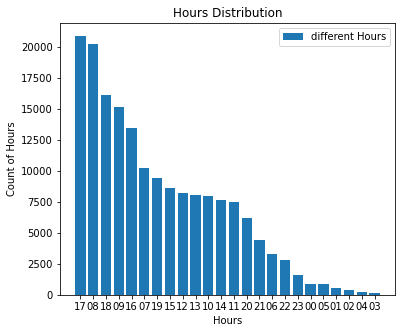

In [276]:
#plotting Hours
plt.figure(figsize=[6,5])
plt.bar(x = df_bike.hour.value_counts().keys(), height = df_bike.hour.value_counts(), label = 'different Hours' )
plt.xlabel('Hours')
plt.ylabel('Count of Hours')
plt.title('Hours Distribution')
plt.legend()
plt.show()

- It is obvious that poeple tend more to use bikes by 5PM and at the early morning at 8AM. Which may apply that bikes are faster transport during high traffic hours

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The duration_trip was skweed and had many points(long tail) and needed a scale transformation. Most Trips were under 2000 sec. The peak was a round 600 sec.
- The days of the week had more trips than weekends, also it is obvious that trips peek is on Tuesday.
- Users' ages between 20 to 40 are the majority of the users 
- Subscribers are the majority users of our bike syste.
- Our users tend more to use bikes during traffic hours (8AM and 5PM).
- No clear relation between start stations nor end stations with our customers.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I used the birth year to get the age of our users. I also used the start time to get month, day and hour to help me invesitgate more into the data to get a better precpetion. Furthermore, I grouped the ages into groups to have a clear and consize chart of the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

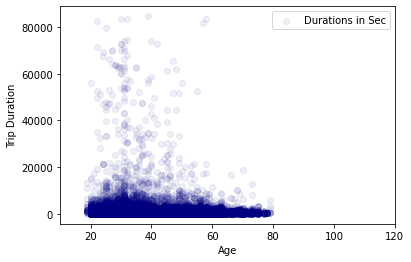

In [277]:
#plotting Scatter plot to check reltion between age and trip duration 
fig, ax = plt.subplots()
ax.scatter(data=df_bike, x='age', y='duration_sec', alpha=1/15, c = 'navy', label = 'Durations in Sec')
plt.xlim(10,120) 
plt.xlabel('Age')
plt.ylabel('Trip Duration')
ax.legend()

plt.show()

- Most of the durations are below 2000 secons and the age is below 80 years old. Also, as the age goes up and above 80s the trip duration goes way down

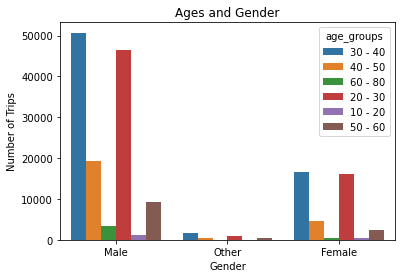

In [278]:
#plotting to illustrate the age groups among the different genders of bike users
sb.countplot(data = df_bike, x = 'member_gender', hue = 'age_groups');

plt.xlabel('Gender');
plt.title('Ages and Gender');
plt.ylabel('Number of Trips');

- It is clear the the age group (30- 40) in males and females is the highest in the number of trips and also it is higher for males than females.

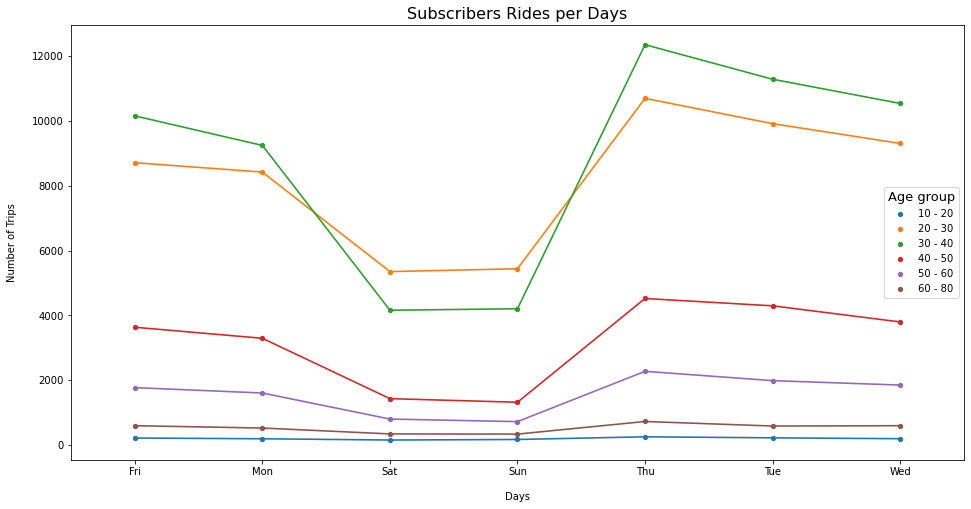

In [279]:
subscribers = df_bike[df_bike['user_type']=='Subscriber'].groupby(['day', 'age_groups']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(16,8))
axis = sb.pointplot(x='day', y='bike_id', hue='age_groups', scale=.6, data=subscribers)
plt.title("Subscribers Rides per Days", fontsize=16)
plt.xlabel('Days', labelpad=15)
plt.ylabel('Number of Trips', labelpad=15)
leg = axis.legend()
leg.set_title('Age group',prop={'size':13})
axis = plt.gca()


- As shown, The Age groups that ranges from 20 to 40 are the highest in the number of trips especially people whose ages ranges from 30 to 40. Also as we go throgh the week days we find that Thursday comes at the peak for trips and on the other hand, the weekends(Sun and Sat) are at the least.

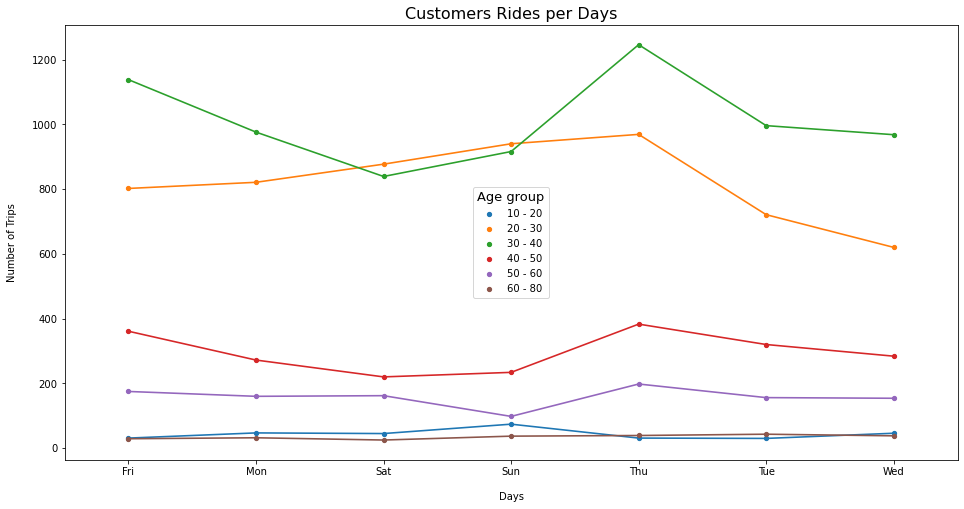

In [280]:
subscribers = df_bike[df_bike['user_type']=='Customer'].groupby(['day', 'age_groups']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(16,8))
axis = sb.pointplot(x='day', y='bike_id', hue='age_groups', scale=.6, data=subscribers)
plt.title("Customers Rides per Days", fontsize=16)
plt.xlabel('Days', labelpad=15)
plt.ylabel('Number of Trips', labelpad=15)
leg = axis.legend()
leg.set_title('Age group',prop={'size':13})
axis = plt.gca()


- Customers tend to be almost the same as the subscibers in the same age groups and the same peak day

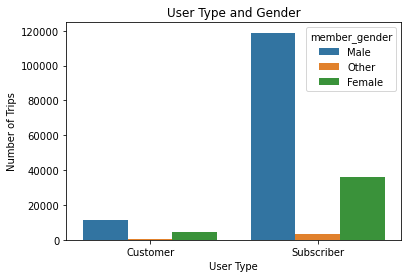

In [281]:
#plotting user types among the different genders
sb.countplot(data = df_bike, x = 'user_type', hue = 'member_gender');
plt.xlabel('User Type');
plt.title('User Type and Gender');
plt.ylabel('Number of Trips');

- The majority of users are subscribers and they also males 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


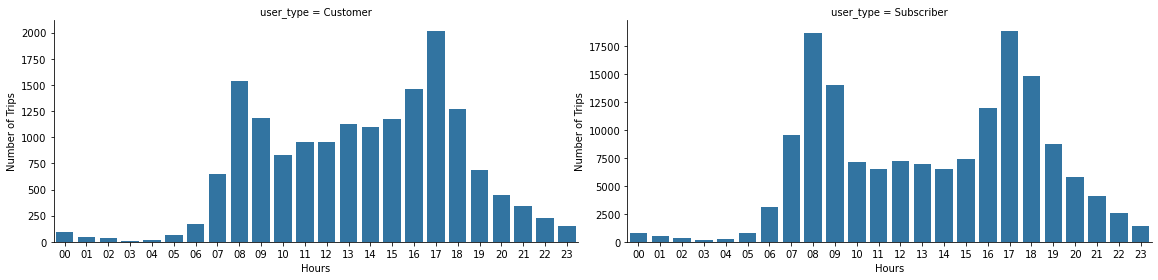

In [282]:
#plotting the user types through the different hours 
ax = sb.FacetGrid(data=df_bike,col='user_type', col_wrap = 2, height = 4, aspect=2, sharey=False)
ax.map(sb.countplot, 'hour')
for i in range(2):
    ax.axes[i].set_xlabel('Hours')
    ax.axes[i].set_ylabel('Number of Trips')


- For both types of our users, the bikes are most used at 8AM and 5PM. Also from 10AM to 3PM the need for bikes decreases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Also  the age has a reltion with the trip duration as the age increases, the duration decreases and to be specific users who ages 80 and older tend to be the least users of the bikes.(rarely using bikes)
- There is also a realtion between age and gender, users in age groups 20-30 and 30-40 are the majoirty users and they are males and their number are way higher than females.
- The charts above show the relation between age groups and days as we can see the age groups that range from 20 to 40 are the most active users of bikes espcially on work days and their usage of bikes decreases by weekends.
- The majority of the users are subscribers and they also males.
- The most needed hours are 8AM and 5PM and the need decreases from 10AM to 3PM


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Yes, The huge difference between the number of users of males comparing to females and also there is a big gap between the number of subscribers and customers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


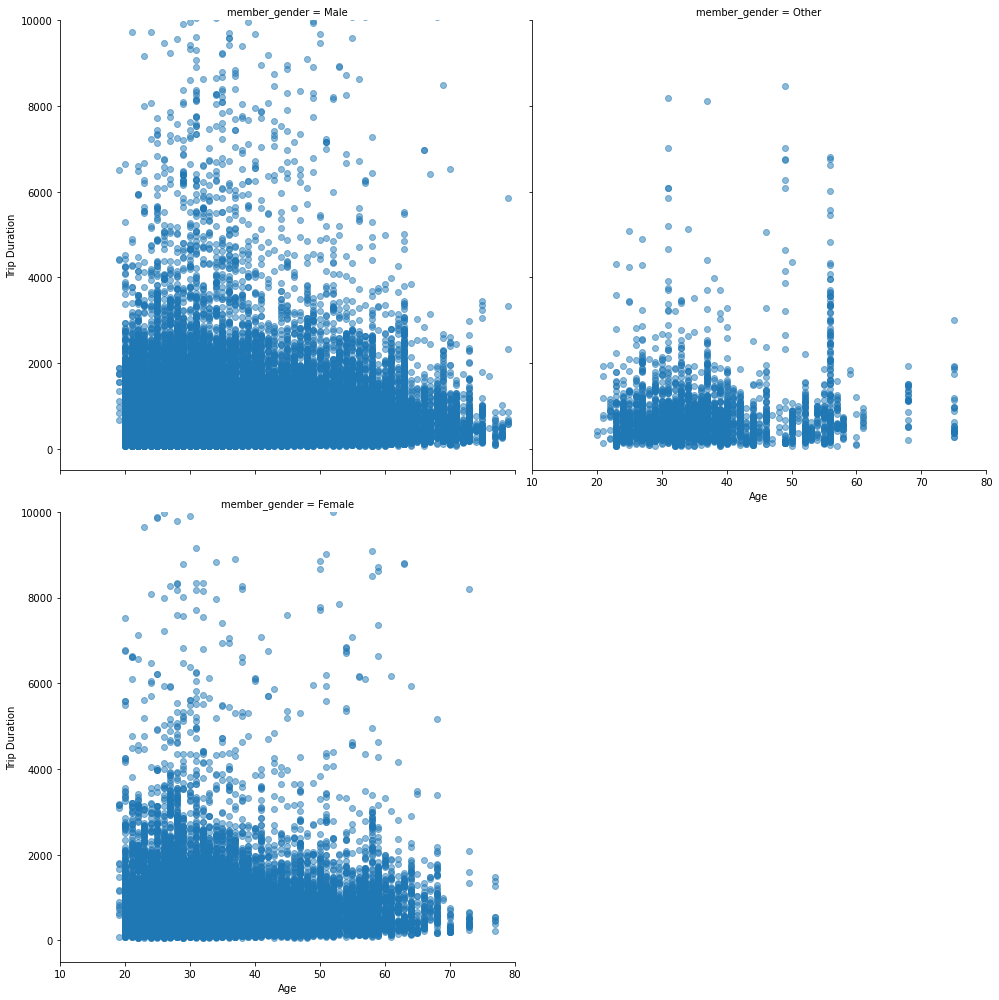

In [283]:
#plotting the gender and age to check how they relate to trip duration
gender = sb.FacetGrid(data = df_bike, col = 'member_gender', col_wrap = 2, size = 7,
                 xlim = [10, 80], ylim = [-500, 10000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha=0.50)
gender.set_xlabels('Age')
gender.set_ylabels('Trip Duration')
plt.show()

- Most of females and males have a duration under 2000 sec while there is a jump in duration for others at an older age  who are around 55 years old.

Text(13.035247395833338, 0.5, 'Duration')

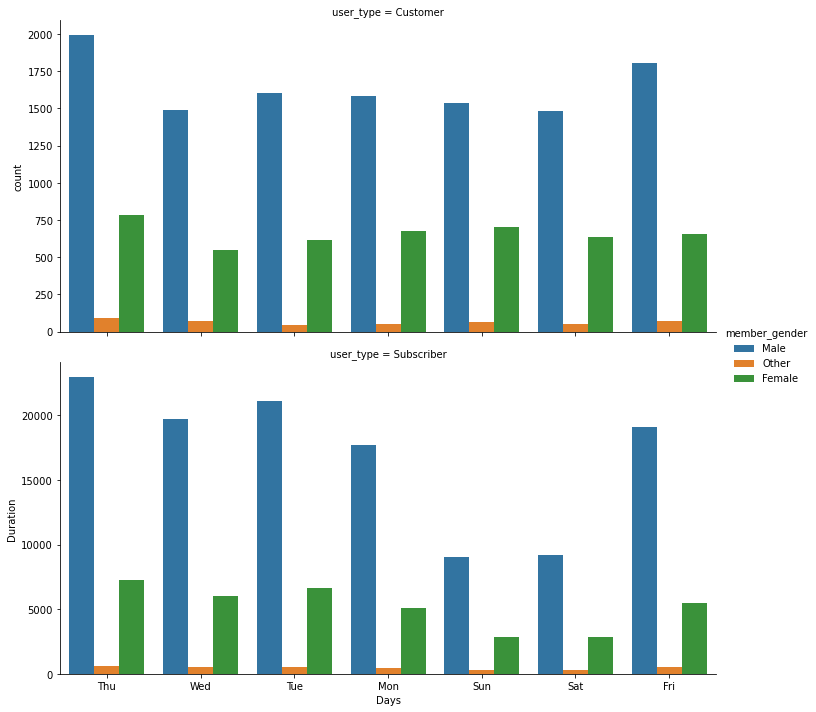

In [284]:
#plotting the user types and gender to check how they relate to trip duration
sb.catplot(data=df_bike,x='day',col='user_type', 
           hue='member_gender', col_wrap = 1, 
           height = 5, aspect=2, 
           sharey=False, kind='count')
plt.xlabel('Days')
plt.ylabel('Duration')

- The male customers and subscribers have the lead for all days with a slight difference for male and female customers as they use bikes for all week days and week ends with almost the same durations 

Text(9.033282696759265, 0.5, 'Duration')

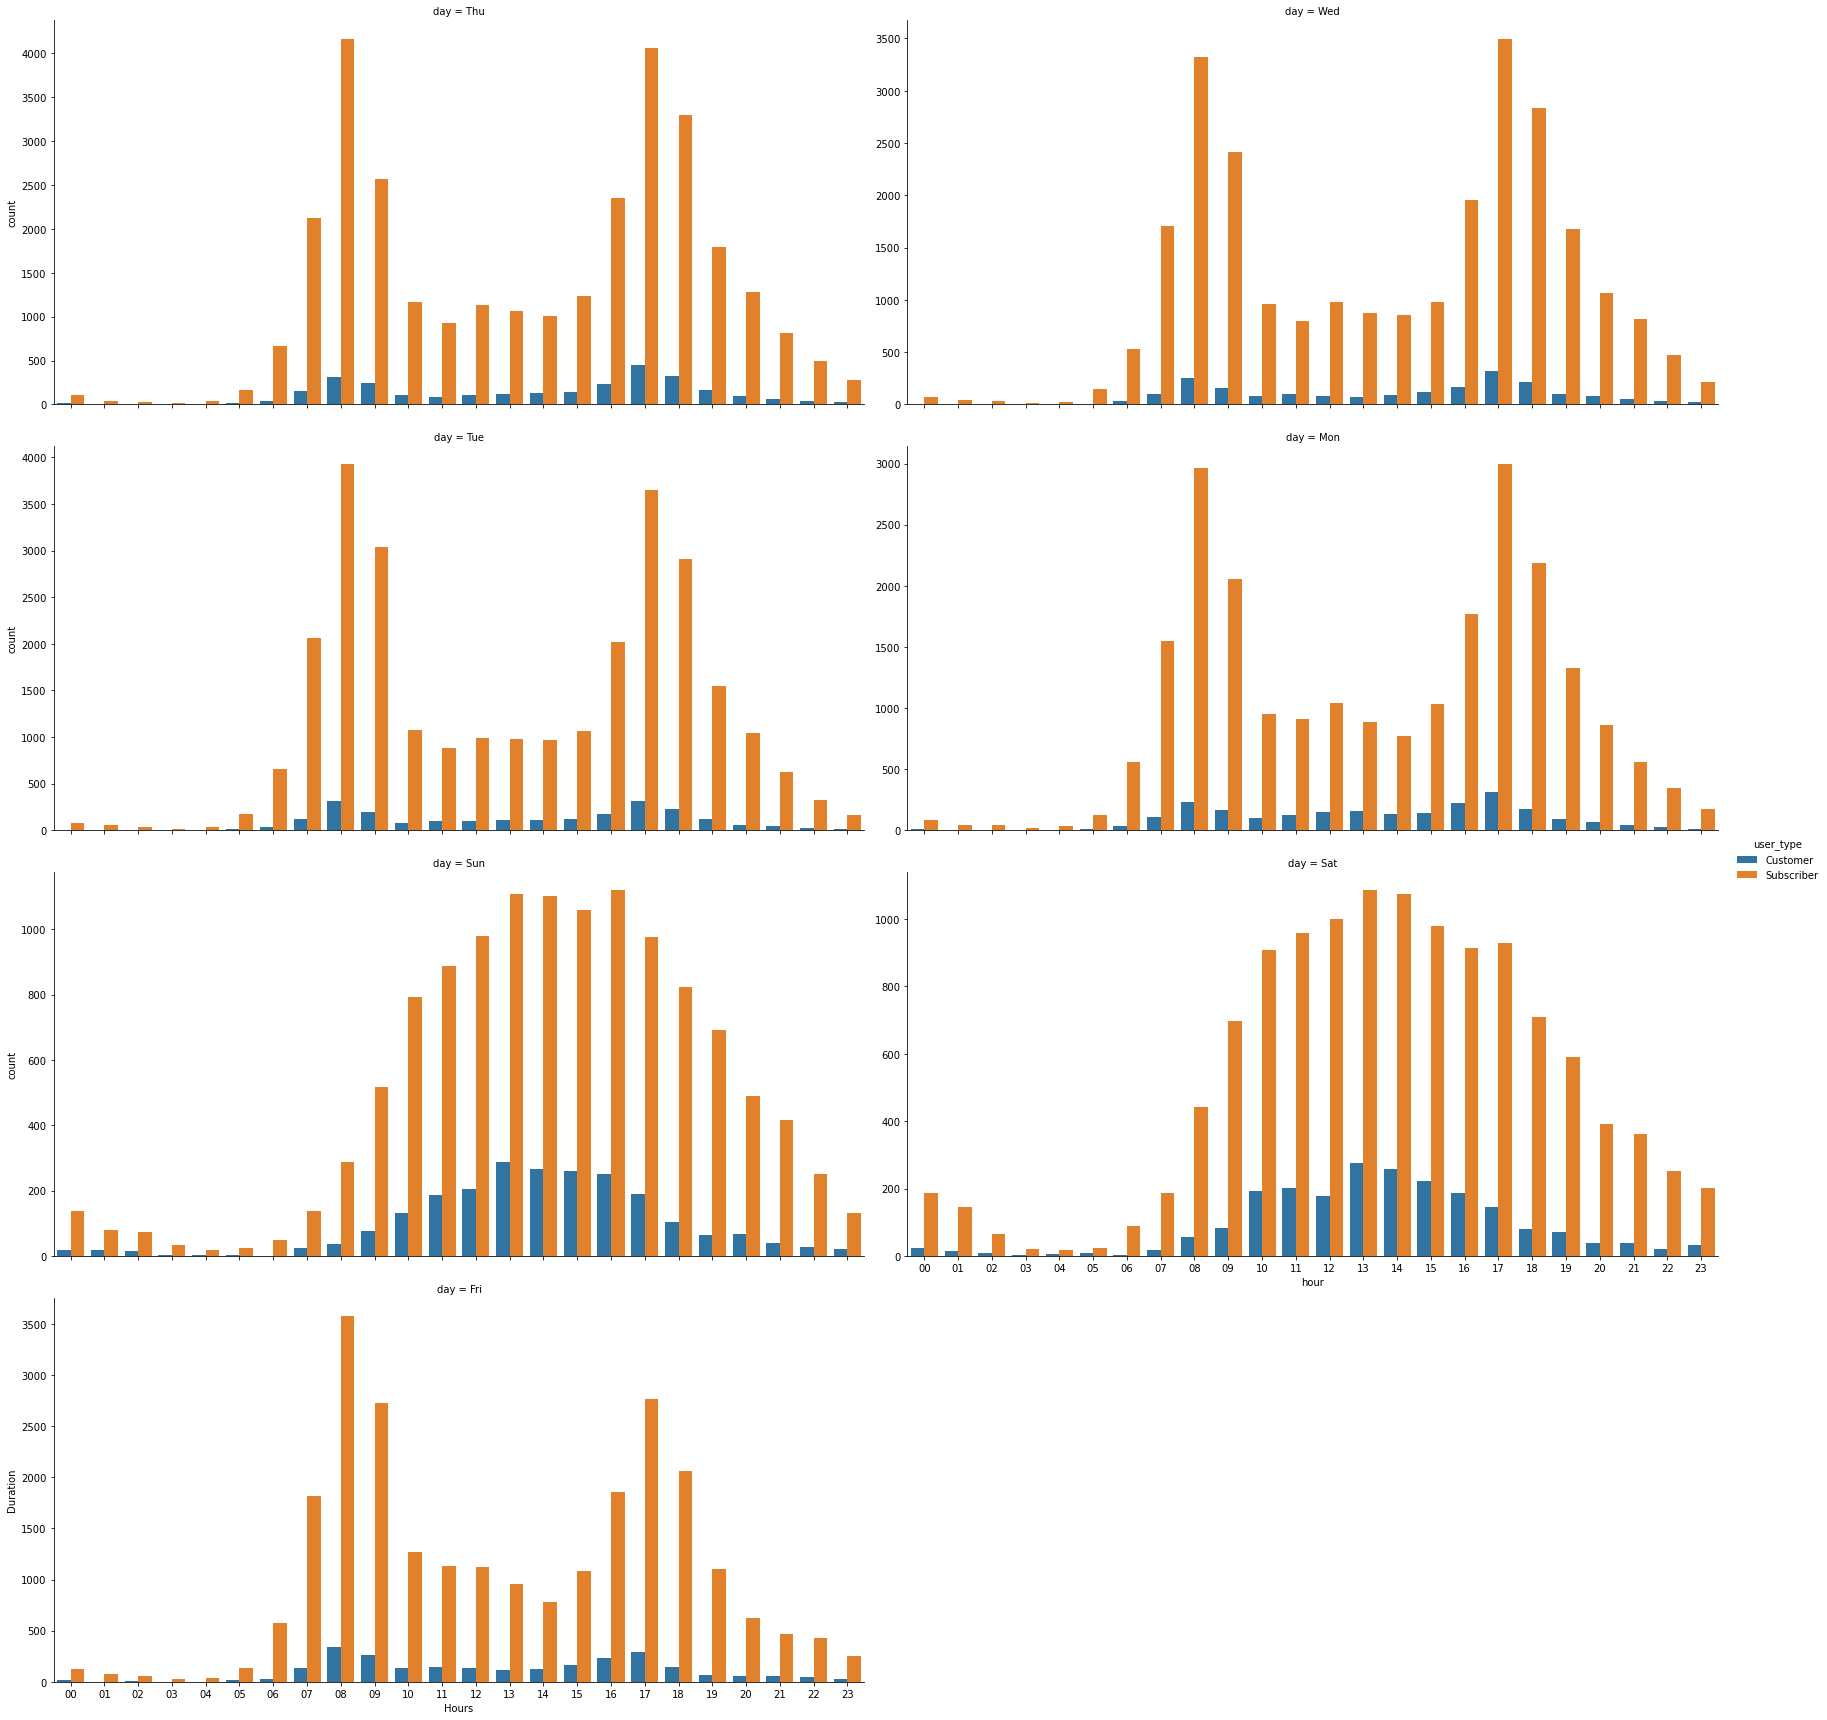

In [285]:
#plotting the different days and user types to check how they relate to trip duration
sb.catplot(data=df_bike,x='hour',col='day', 
           hue='user_type', col_wrap = 2, 
           height = 6, aspect=2, 
           sharey=False, kind='count')
plt.xlabel('Hours')
plt.ylabel('Duration')

- Friday and Saturday both have a high curve that start at 8AM and reachs it paek around 3PM and starts to decrease after that. on the other hand the, the peak hours for the rest of the days are 8Am and 5PM  

Text(17.19207899305556, 0.5, 'Duration')

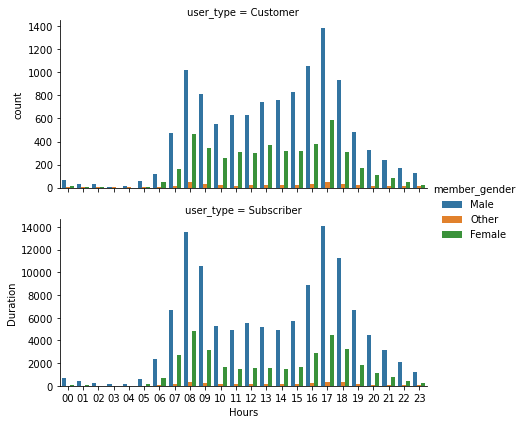

In [286]:
#plotting the user types and gender to check how they relate to trip duration
sb.catplot(data=df_bike,x='hour',col='user_type', 
           hue='member_gender', col_wrap = 1, 
           height = 3, aspect=2, 
           sharey=False, kind='count')
plt.xlabel('Hours')
plt.ylabel('Duration')

- The male customers and subscribers has the highest duration values within the same peak hours 

Text(557.4588123139881, 0.5, 'Duration')

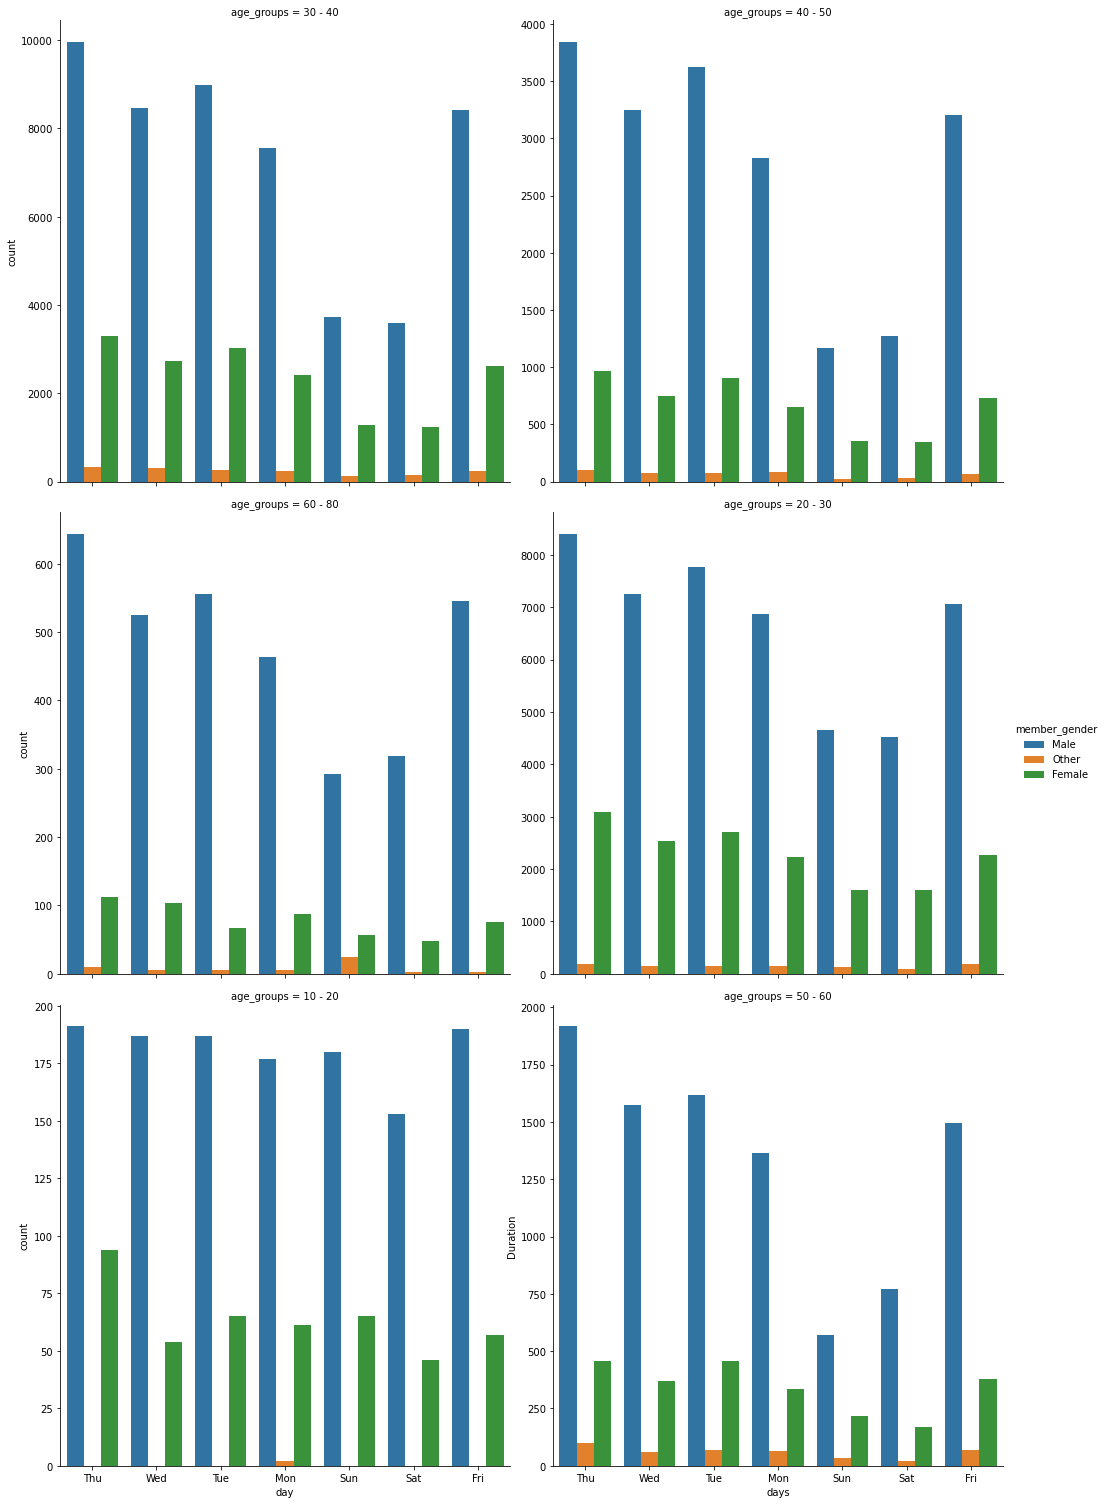

In [287]:
#plotting the days and age groups to check how they relate to gender
sb.catplot(data=df_bike,x='day',col='age_groups', 
           hue='member_gender', col_wrap = 2, 
           height = 7, aspect=1, 
           sharey=False, kind='count')
plt.xlabel('days')
plt.ylabel('Duration')

- Age groups 20-30 and 30-40 both exceeds 8000 sec and males still on the top of users of bikes comparing to females. Also the same age groups use bikes more on week days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The duration is dependent on the age as the age increase, the duration decrease and almost vanish by age of 80 and the illustrated charts in all the investigations  showed that.
- The days has a trend of higher usage of bikes on week days 
- Also the males in all age groups have the lead of using bikes during the whole week except for age groups 20-30 and 30-40 who tend to use less bikes on weekends
- Both males and females have the same peak hours (8AM and 5PM) for both user types (customer and subscriber).
### Were there any interesting or surprising interactions between features?

- I think the jump in duration of people who over 60 years old of gender others, was a surprise. Also males being domianant users. 